In [1]:
if (!require("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}

if (!require("ggtree", quietly = TRUE)) {
  BiocManager::install("ggtree")
}

if (!require("aplot", quietly = TRUE)) {
  install.packages("aplot")
}

ggtree v3.10.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package
for phylogenetic tree input and output with richly annotated and
associated data. Molecular Biology and Evolution. 2020, 37(2):599-603.
doi: 10.1093/molbev/msz240

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194 



In [2]:
library(ggtree)
library(ggplot2)
library(aplot)

In [3]:
or_genes <- read.csv("data/ORgenes.csv")
or_genes[
  which(or_genes$Species == "Loxodonta Africana"),
  "Species"
] <- "Loxodonta africana"


In [4]:
species_tree <- read.tree("data/phyliptree.phy")
species_tree$tip.label <- as.vector(noquote(gsub(
  "\'",
  "",
  species_tree$tip.label,
  fixed = TRUE
)))
basionym_and_synonym <- list(
  c("Nesogale talazaci", "Microgale talazaci"),
  c("Phataginus tricuspis", "Manis tricuspis"),
  c("Tupaia chinensis", "Tupaia belangeri chinensis")
)
for (i in basionym_and_synonym) {
  species_tree$tip.label[which(species_tree$tip.label == i[1])] <- i[2]
}

# NCBI couldn't find the subspecies
print(setdiff(or_genes$Species, species_tree$tip.label))


[1] "Ceratotherium cottoni"


In [5]:
order_list <- c(
  "Rodentia",
  "Artiodactyla",
  "Primates",
  "Perissodactyla",
  "Carnivora",
  "Chiroptera",
  "Eulipotyphla",
  "Pilosa",
  "Cingulata",
  "Tupaia"
)


In [6]:
species_order <- sapply(order_list, function(i) {
  tips <- species_tree$tip.label[tidytree::offspring(species_tree, i)]
  tips[!is.na(tips)]
})
other_mammals <- setdiff(
  species_tree$tip.label,
  unlist(species_order)
)
write.table(
  other_mammals,
  "data/other_mammals.txt",
  row.names = FALSE,
  col.names = FALSE,
  quote = FALSE
)
species_order[["Other_mammals"]] <- other_mammals


In [7]:
tree_with_group <- groupOTU(
  species_tree,
  species_order,
  group_name = "species_order"
)


In [8]:
order_colors <- list(
  "red",
  "blue",
  "dark green",
  "orange",
  "purple",
  "magenta",
  "navy",
  "green",
  "cyan",
  "dark blue",
  "dark grey"
)
names(order_colors) <- names(species_order)

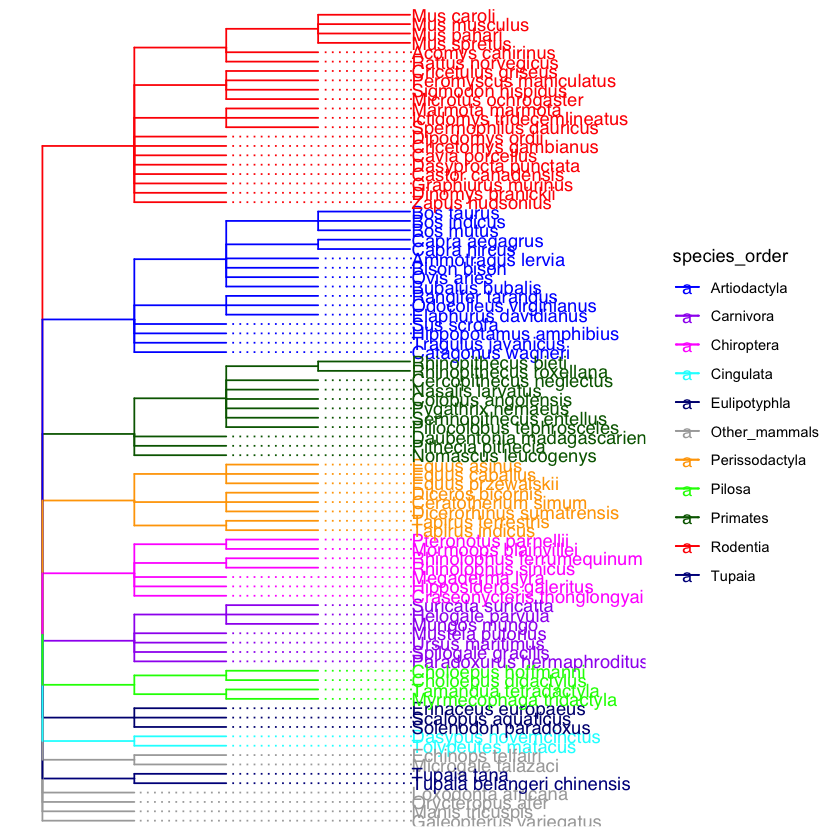

In [9]:
g <- ggtree(tree_with_group, aes(color = species_order)) +
  geom_tiplab(align = TRUE) +
  xlim(0, 25) +
  scale_color_manual(values = order_colors)

ggsave("plots/order_tree.png", g, width = 20, height = 12)
g


In [10]:
missing_order <- data.frame(
  "values" = "Ceratotherium cottoni",
  "ind" = "Perissodactyla"
)
order_values <- rbind(stack(species_order), missing_order)
colnames(order_values) <- c("Species", "Order")
or_genes_with_order <- merge(or_genes, order_values, by = "Species")


In [11]:
with_missing_value <- or_genes_with_order[
  which(!or_genes_with_order$Species == "Ceratotherium cottoni"),
]


In [12]:
with_missing_value[["Gene_repetoire"]] <- with_missing_value[["Functional"]] +
  with_missing_value[["NonFuctional"]]


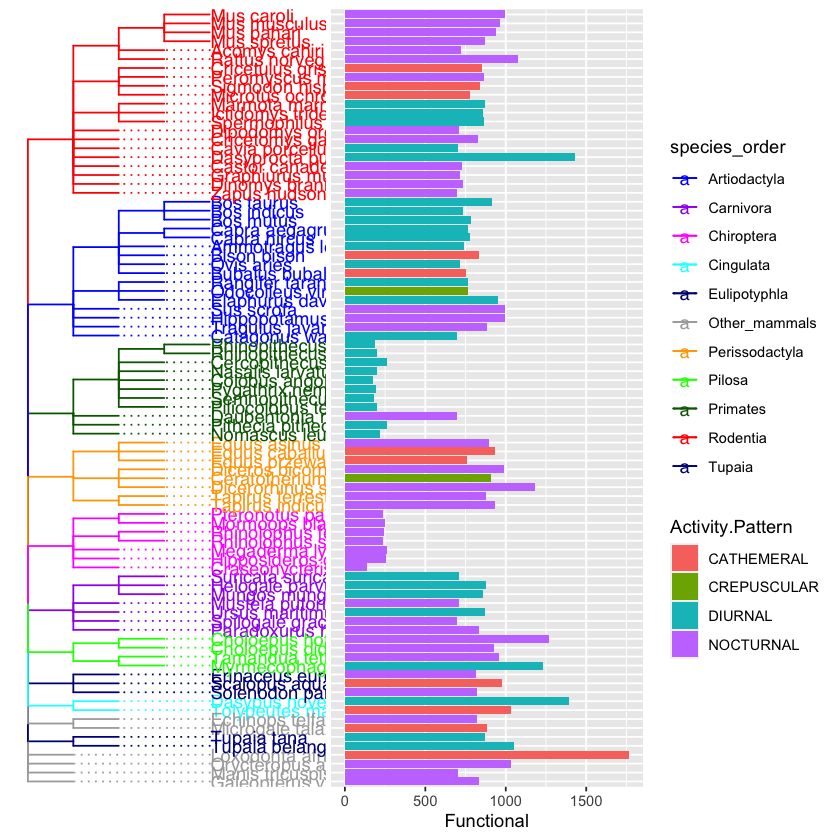

In [13]:
func_gene_bar_plot <- ggplot(
  with_missing_value,
  aes(Species, Functional, fill = Activity.Pattern)
) +
  geom_col() +
  coord_flip() +
  theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
  )

insert_left(func_gene_bar_plot, g)


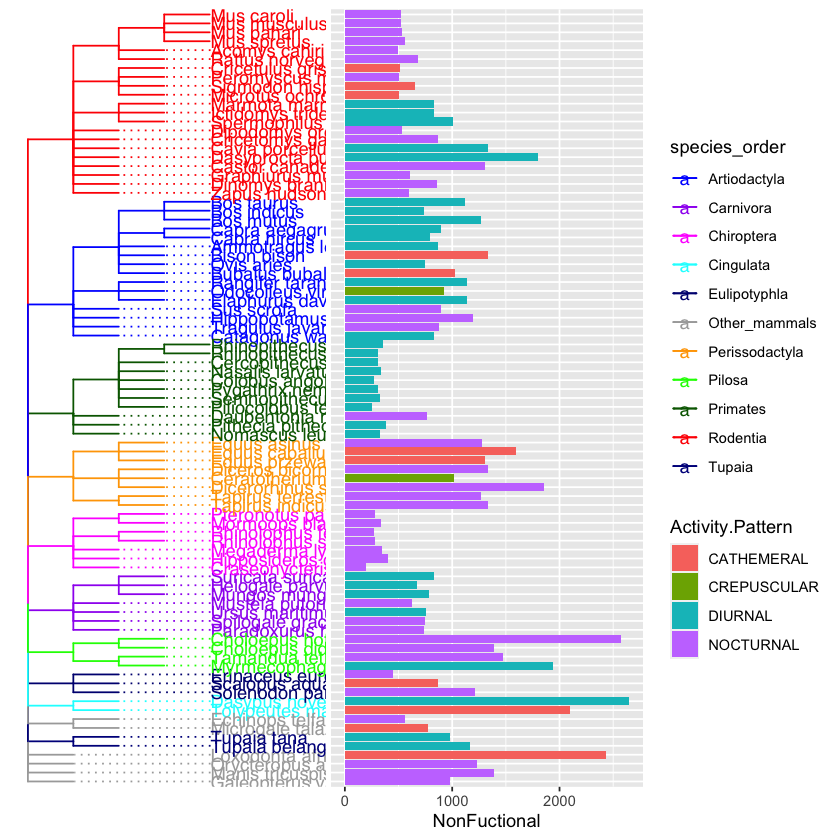

In [14]:
func_gene_bar_plot <- ggplot(
  with_missing_value,
  aes(Species, NonFuctional, fill = Activity.Pattern)
) +
  geom_col() +
  coord_flip() +
  theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
  )

insert_left(func_gene_bar_plot, g)


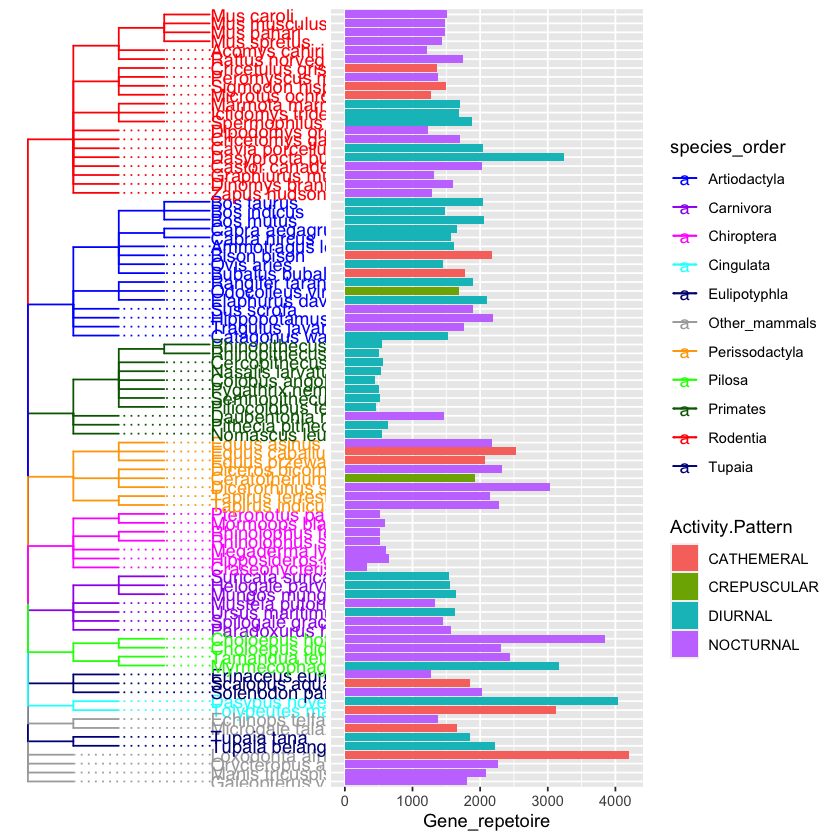

In [15]:
func_gene_bar_plot <- ggplot(
  with_missing_value,
  aes(Species, Gene_repetoire, fill = Activity.Pattern)
) +
  geom_col() +
  coord_flip() +
  theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
  )

p <- insert_left(func_gene_bar_plot, g)

ggsave("plots/tree_with_gene_repertoire.png", p, width = 12, height = 10)
p
